# Plot

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.ion()
plt.show()

In [2]:
df = pd.read_pickle("results.pkl")
df.head()

,np,nb,time_gis,time_mobility
0,22,4,281.386 ms,37.716 ms
1,22,4,277.190 ms,39.764 ms
2,22,4,282.596 ms,37.926 ms
3,22,4,291.498 ms,41.114 ms
4,22,4,271.508 ms,37.255 ms


In [3]:
df["time_gis"] = df["time_gis"].apply(lambda x: float(x.split()[0]))

df["time_mobility"] = df["time_mobility"].apply(lambda x: float(x.split()[0]))

df.groupby(["np"]).mean().round(2)

,time_gis,time_mobility
np,,
22,280.84,38.76
220,286.84,41.13
2200,813.20,251.51
22000,53230.37,9118.74
220000,5074234.04,325804.08


In [4]:
df = pd.melt(df, id_vars=["np", "nb"])
df.head()

,np,nb,variable,value
0,22,4,time_gis,281.386
1,22,4,time_gis,277.190
2,22,4,time_gis,282.596
3,22,4,time_gis,291.498
4,22,4,time_gis,271.508


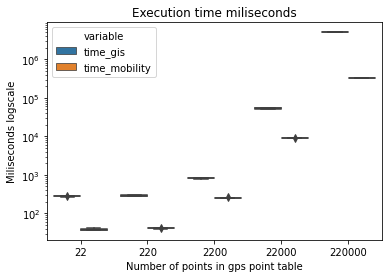

In [6]:
fig = plt.figure()
ax = plt.subplot(111)
sns.boxplot(data = df, x = "np", y = "value", hue = "variable", ax = ax)
ax.set_yscale('log')
plt.xlabel("Number of points in gps point table")
plt.title("Execution time miliseconds");
plt.ylabel("Miliseconds logscale");